# Lab 5: World Progress


In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from gofer.ok import check

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png" alt="Estimated and project annual world population from 1950 to 2100.  Estimates in 1950 start at 2 billion and grow to 6 billion in 2000.  Projects say the population in 2100 will be 10.9 billion people."/>
</a>

In this project, we will examine some of the factors that influence population growth and how they are changing around the world.


In [2]:
# The population.csv file can also be found online here:
# https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv
# The version in this project was downloaded in February, 2017.
population = Table.read_table('population.csv')
population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


## 1. Bangladesh


In [3]:
b_pop = population.where("geo",are.equal_to("bgd")).where("time",are.between(1970,2016)).select("time","population_total")

b_pop

time,population_total
1970,65048701
1971,66417450
1972,67578486
1973,68658472
1974,69837960
1975,71247153
1976,72930206
1977,74848466
1978,76948378
1979,79141947


In [4]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five

time,population_total
1970,"65,048,701"
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"
2015,"160,995,642"


In [5]:
b_1970_through_2010 = b_five.where('time', are.below_or_equal_to(2010))
b_five_growth = b_1970_through_2010.with_column('annual_growth', (b_five.exclude(0).column(1)/b_1970_through_2010.column(1))**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"65,048,701",1.84%
1975,"71,247,153",2.69%
1980,"81,364,176",2.71%
1985,"93,015,182",2.64%
1990,"105,983,136",2.25%
1995,"118,427,768",2.08%
2000,"131,280,739",1.71%
2005,"142,929,979",1.19%
2010,"151,616,777",1.21%


In [6]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')


In [7]:
life_expectancy

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19
afg,1803,28.18
afg,1804,28.17
afg,1805,28.16
afg,1806,28.15
afg,1807,28.14
afg,1808,28.13
afg,1809,28.12


In [8]:
child_mortality


geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6
afg,1805,468.6
afg,1806,470
afg,1807,470
afg,1808,470
afg,1809,470


In [9]:
fertility

geo,time,children_per_woman_total_fertility
afg,1800,7
afg,1801,7
afg,1802,7
afg,1803,7
afg,1804,7
afg,1805,7
afg,1806,7
afg,1807,7
afg,1808,7
afg,1809,7


In [10]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where("geo",country)
    country_fertility_after_start = country_fertility.where("time",are.above_or_equal_to(start))
    return country_fertility_after_start.select(1, 2).relabel(0, 'Year').relabel(1, 'Children per woman')

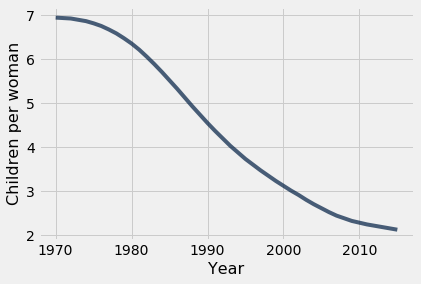

In [11]:
bangladesh_code = "bgd"
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

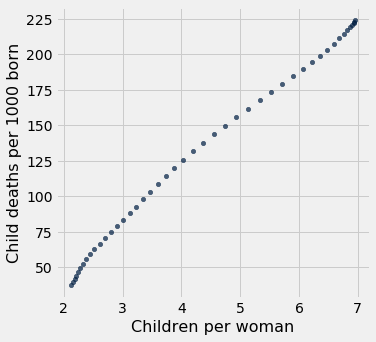

In [12]:
bgd_fertility = fertility.where("geo","bgd").drop("geo")
bgd_child_mortality = child_mortality.where("geo","bgd").drop("geo")
fertility_and_child_mortality = bgd_fertility.join("time",bgd_child_mortality)
post_1969_fertility_and_child_mortality = fertility_and_child_mortality.where("time", are.above(1969)).relabel(1,'Children per woman').relabel(2,'Child deaths per 1000 born')

post_1969_fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

## 2. The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

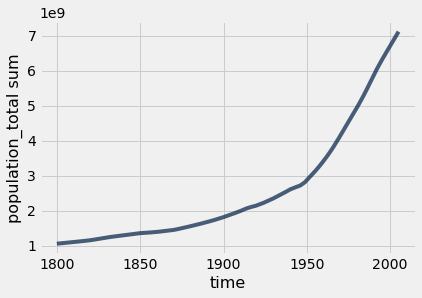

In [13]:
population.where('time', are.between(1800, 2006)).drop('geo').group('time', sum).plot(0)

In [14]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time')
    f = fertility.where('time', year).drop('time')
    c = child_mortality.where('time', year).drop('time')
    return p.join("geo",f.join("geo",c))

In [15]:
stats_for_year(1979)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,13283279,7.67,255.5
arg,27684530,3.37,47
bgd,79141947,6.48,203.3
bra,119341444,4.17,100
can,24257594,1.7,13.3
chn,964155176,2.8,65.9
cod,25656486,6.54,215.4
col,27113510,4.12,61.3
deu,78305017,1.48,16
dza,18760761,7.02,161.7


In [16]:
def pop_for_year(year):
    return sum(stats_for_year(year).column('population_total'))

In [17]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))

pop_by_decade = decades.with_column("population",decades.apply(pop_for_year,"decade"))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,624,944,597"
1970,"3,211,487,418"
1980,"3,880,722,003"
1990,"4,648,434,558"
2000,"5,367,553,063"
2010,"6,040,810,517"


In [18]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
alb,Albania,europe_central_asia
dza,Algeria,middle_east_north_africa
asm,American Samoa,east_asia_pacific
and,Andorra,europe_central_asia
ago,Angola,sub_saharan_africa
aia,Anguilla,america
atg,Antigua and Barbuda,america
arg,Argentina,america


In [19]:
a=stats_for_year(1960)
a

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,8994793,7.67,362.4
arg,20619075,3.11,73.2
bgd,48200702,6.73,264.3
bra,72493585,6.21,171.8
can,17909232,3.91,32.6
chn,644450173,3.99,309
cod,15248246,6,266
col,16480384,6.81,127.3
deu,73179665,2.41,42.87
dza,11124892,7.65,245.7


In [20]:
region_counts = a.join("geo",countries,"country").group("world_6region").relabel(0,"region")
region_counts

region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,10


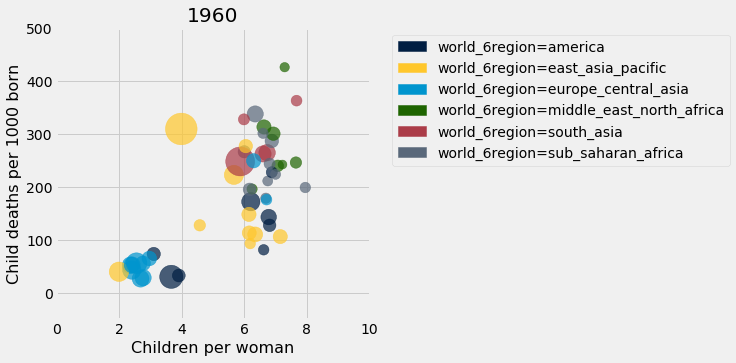

In [21]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once and then saved.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertility_vs_child_mortality(1960)

In [22]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
for year in np.arange(1960, 2016):
    stats_relabeled(year)

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=(…